In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat

In [3]:
info = open('100m.info', 'r')
x= info.readlines()
info.close()
print(x)
for i in x:
    print(i)

['Source: record mitdb/100\n', 'val has 1 row (signal) and 3600 columns (samples/signal)\n', 'Duration:     0:10\n', 'Sampling frequency: 360 Hz  Sampling interval: 0.002777777778 sec\n', 'Row\tSignal\tGain\tBase\tUnits\n', '1\tV5\t200\t0\tmV\n', '\n', 'To convert from raw units to the physical units shown\n', "above, call the 'rdmat.m' function from the wfdb-matlab\n", 'toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/\n']
Source: record mitdb/100

val has 1 row (signal) and 3600 columns (samples/signal)

Duration:     0:10

Sampling frequency: 360 Hz  Sampling interval: 0.002777777778 sec

Row	Signal	Gain	Base	Units

1	V5	200	0	mV



To convert from raw units to the physical units shown

above, call the 'rdmat.m' function from the wfdb-matlab

toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



In [4]:
def leer_info_archivo(archivo):
    """
    Lee un archivo .info y extrae los valores de "Sampling frequency" y "Signal\tGain\tBase\tUnits".

    Argumentos:
    - archivo: Ruta del archivo .info

    Retorna:
    Un diccionario con los valores de "Sampling frequency" y "Signal\tGain\tBase\tUnits"
    """
    valores = {}  # Diccionario para almacenar los valores extraídos

    with open(archivo, 'r') as f:  # Abrir el archivo en modo de lectura usando 'with' para asegurar su cierre
        lines = f.readlines()  # Leer todas las líneas del archivo y almacenarlas en una lista

        for line in lines:  # Iterar sobre cada línea del archivo
            if line.startswith('Sampling frequency:'):  # Verificar si la línea comienza con 'Sampling frequency:'
                freq = line.split(':')[1].strip().split()[0]  # Extraer el valor de frecuencia eliminando espacios y separando por palabras
                valores['Sampling frequency'] = int(freq)  # Almacenar el valor de frecuencia convertido a entero en el diccionario 'valores'
            elif line.startswith('Row\tSignal\tGain\tBase\tUnits'):  # Verificar si la línea comienza con 'Row\tSignal\tGain\tBase\tUnits'
                units_line = lines[lines.index(line) + 1]  # Obtener la siguiente línea que contiene los valores de las unidades
                units = units_line.strip().split('\t')  # Separar los valores de las unidades utilizando el tabulador como separador
                signal, gain, base, units = units[1], units[2], units[3], units[4]  # Asignar los valores a variables individuales
                valores['Signal'] = signal  # Almacenar el valor de la señal en el diccionario 'valores'
                valores['Gain'] = int(gain)  # Almacenar el valor de la ganancia convertido a entero en el diccionario 'valores'
                valores['Base'] = int(base)  # Almacenar el valor de la base convertido a entero en el diccionario 'valores'
                valores['Units'] = units  # Almacenar los valores de las unidades en el diccionario 'valores'

    return valores  # Retornar el diccionario con los valores extraídos

# Ejemplo de uso
archivo = '100m.info'
valores = leer_info_archivo(archivo)
print(valores)


{'Sampling frequency': 360, 'Signal': 'V5', 'Gain': 200, 'Base': 0, 'Units': 'mV'}


In [5]:
leer_info_archivo('100m.info')

{'Sampling frequency': 360,
 'Signal': 'V5',
 'Gain': 200,
 'Base': 0,
 'Units': 'mV'}

In [6]:
leer_info_archivo('16265m.info')

{'Sampling frequency': 128,
 'Signal': 'ECG1',
 'Gain': 200,
 'Base': 0,
 'Units': 'mV'}

In [7]:
leer_info_archivo('s0010_rem.info')

{'Sampling frequency': 1000,
 'Signal': 'v5',
 'Gain': 2000,
 'Base': 0,
 'Units': 'mV'}

In [ ]:
x = loadmat('100m.mat')
print(len(x['val'][0]))
print((x['val'] - 0) / 200)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def graficar_ecg(archivo, Gain, base, frecuencia):
    """
    Carga un archivo .mat que contiene datos de ECG y grafica la señal.

    Argumentos:
    - archivo: Ruta del archivo .mat que contiene los datos de ECG
    - Gain: Ganancia de la señal de ECG
    - base: Valor de referencia de la señal de ECG
    - frecuencia: Frecuencia de muestreo de la señal de ECG

    Retorna:
    None
    """
    # Cargar archivo .mat
    x = loadmat(archivo)

    # Obtener los datos del ECG y normalizarlos
    ecg1 = (x['val'] - base) / Gain

    # Transponer los datos del ECG
    ecg = np.transpose(ecg1)

    # Intervalo de tiempo entre muestras
    tm = 1 / frecuencia

    # Crear un array de tiempo para el ECG
    t = np.linspace(0, np.size(ecg), np.size(ecg)) * tm

    # Graficar el ECG
    plt.plot(t, ecg)
    plt.xlabel('Tiempo (s)')  # Etiqueta del eje x
    plt.ylabel('Amplitud (mV)')  # Etiqueta del eje y
    plt.title('ECG')  # Título de la gráfica
    plt.grid(True)  # Mostrar una cuadrícula en la gráfica
    plt.show()  # Mostrar la gráfica

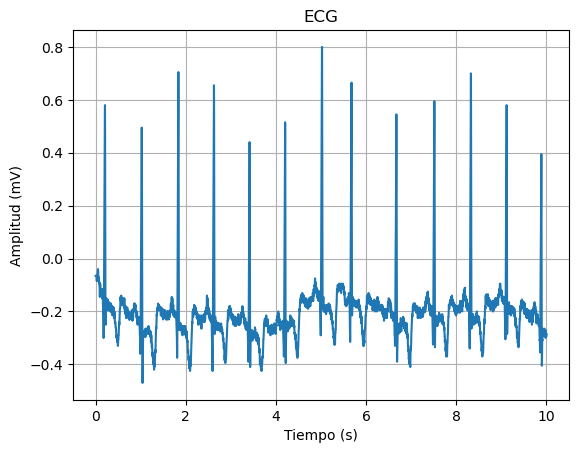

In [10]:

# Llamar a la función para graficar el ECG
graficar_ecg('100m.mat', 200, 0, 360)


$5\sin(2\pi*6 t) + \sin(2\pi t) $

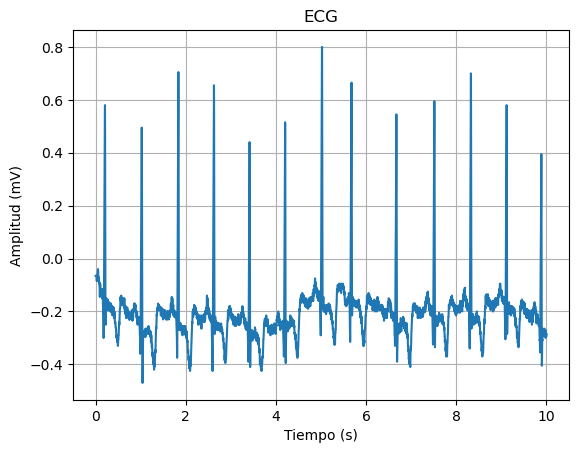

In [11]:
# Cargar archivo .mat
x = loadmat('100m.mat')

# Obtener los datos del ECG y normalizarlos
ecg1 = (x['val'] - 0) / 200

# Transponer los datos del ECG
ecg = np.transpose(ecg1)

# Frecuencia de muestreo (360 Hz según las especificaciones)
fs = 360

# Intervalo de tiempo entre muestras
tm = 1 / fs

# Crear un array de tiempo para el ECG
t = np.linspace(0, np.size(ecg), np.size(ecg)) * tm

# Graficar el ECG
plt.plot(t, ecg)
plt.xlabel('Tiempo (s)')  # Etiqueta del eje x
plt.ylabel('Amplitud (mV)')  # Etiqueta del eje y
plt.title('ECG')  # Título de la gráfica
plt.grid(True)  # Mostrar una cuadrícula en la gráfica
plt.show()  # Mostrar la gráfica


In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

# Cargar archivo .mat
x = loadmat('100m.mat')

# Obtener los datos del ECG y normalizarlos
ecg1 = (x['val'] - 0) / 200

# Transponer los datos del ECG
ecg = np.transpose(ecg1)

# Frecuencia de muestreo (360 Hz según las especificaciones)
fs = 360

# Calcular la FFT y las frecuencias correspondientes
fft_data = np.fft.fft(ecg)
n = len(ecg)
freq = np.fft.fftfreq(n, d=1/fs)

# Obtener el espectro de frecuencia (magnitud de la FFT)
spectrum = np.abs(fft_data)

# Graficar el espectro de frecuencia
plt.plot(np.abs(freq[:n//2]), spectrum[:n//2])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia del ECG')
plt.grid(True)
plt.show()


In [ ]:
x_1=loadmat('s0010_rem.mat')
ecg2=(x_1['val']-0)/2000
ecg22=np.transpose(ecg2)
f2=1000
t2=1/f2
t2m=np.linspace(0,np.size(ecg22),np.size(ecg22))*t2

In [ ]:
plt.plot(t2m, ecg22)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('ECG')
plt.grid(True)
plt.show()

In [ ]:
x_2=loadmat('16265m.mat')
ecg3=(x_2['val']-0)/200
ecg33=np.transpose(ecg3)
f2=128
t2=1/f2
t3m=np.linspace(0,np.size(ecg33),np.size(ecg33))*t2

In [ ]:
from scipy import signal

# Definir los parámetros del filtro
lowcut = 0.5  # Frecuencia de corte inferior
highcut = 40.0  # Frecuencia de corte superior
fs = 128  # Frecuencia de muestreo

# Crear los coeficientes del filtro FIR utilizando el método de ventana de Kaiser
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
numtaps = 101  # Número de coeficientes del filtro
window = 'hamming'  # Ventana utilizada para diseñar el filtro
b = signal.firwin(numtaps, [low, high], pass_zero=False, fs=fs, window=window)

# Aplicar el filtro a la señal de ECG
filtered_ecg = signal.lfilter(b, 1, ecg33)

# Graficar la señal filtrada
plt.plot(t3m, filtered_ecg)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('ECG filtrado')
plt.grid(True)
plt.show()


In [ ]:
plt.plot(t3m, ecg33)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('ECG')
plt.grid(True)
plt.show()

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

# Cargar archivo .mat
x_2 = loadmat('16265m.mat')
ecg3 = (x_2['val'] - 0) / 200
ecg33 = np.transpose(ecg3)
f2 = 128
t2 = 1 / f2
t3m = np.linspace(0, np.size(ecg33) - 1, np.size(ecg33)) * t2

# Limitar los datos a 0 a 1 segundo
t_limit = 1.0  # Segundos
n_limit = int(t_limit * f2)
t3m_limit = t3m[:n_limit]
ecg33_limit = ecg33[:n_limit]

# Graficar el ECG limitado a 0 a 1 segundo
plt.plot(t3m_limit, ecg33_limit)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('ECG (0 a 1 segundo)')
plt.grid(True)
plt.show()


In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

f2 = 128
t2 = 1 / f2
t3m = np.linspace(0, np.size(wiener_filtered) - 1, np.size(wiener_filtered)) * t2

# Limitar los datos a 0 a 1 segundo
t_limit = 1.0  # Segundos
n_limit = int(t_limit * f2)
t3m_limit = t3m[:n_limit]
ecg33_limit = wiener_filtered[:n_limit]

# Graficar el ECG limitado a 0 a 1 segundo
plt.plot(t3m_limit, ecg33_limit)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('ECG (0 a 1 segundo)')
plt.grid(True)
plt.show()


In [ ]:
from scipy.signal import wiener, medfilt
import matplotlib.pyplot as plt
##obtener la señal original
filtered_ecg = signal.lfilter(b, 1, ecg33)
original_signal = filtered_ecg
##filtro Wiener
wiener_filtered = wiener(original_signal, mysize=None, noise=None)
##filtro Mediano
medfilt_filtered = medfilt(original_signal, kernel_size=5)
##graficar la escena original, el filtro Wiener y el filtro Mediano
plt.figure()
##plt.plot(original_signal, label='Escena original')
plt.plot(wiener_filtered, label='Filtro Wiener')
##plt.plot(medfilt_filtered, label='Filtro Mediano')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtros Wiener y Mediano')
plt.show()

# Aplicar el filtro a la señal de ECG


In [ ]:
from scipy.fft import fft

In [ ]:
# Cargar archivo .mat
mat_file = loadmat('16265m.mat')

# Obtener los datos del ECG y convertirlos en un array 
ecg_data = mat_file['val'].flatten()

# Frecuencia de muestreo (128 Hz según las especificaciones)
fs = 128

# Calcular la FFT de los datos del ECG
fft_data = fft(ecg_data)

# Obtener la longitud de los datos del ECG
n = len(ecg_data)

# Calcular las frecuencias correspondientes a la FFT
freq = np.fft.fftfreq(n, d=1/fs)

# Obtener el espectro de frecuencia (magnitud de la FFT)
spectrum = np.abs(fft_data)
# Graficar el espectro de frecuencia
plt.plot(freq[:n//2], spectrum[:n//2])  # Trazar solo la mitad de los valores para evitar redundancia
plt.xlabel('Frecuencia (Hz)')  # Etiqueta del eje x
plt.ylabel('Amplitud')  # Etiqueta del eje y
plt.title('Espectro de frecuencia del ECG')  # Título de la gráfica
plt.grid(True)  # Mostrar una cuadrícula en la gráfica
plt.show()  # Mostrar la gráfica


In [ ]:
fft_data = fft(wiener_filtered)

# Obtener la longitud de los datos del ECG
n = len(wiener_filtered)

# Calcular las frecuencias correspondientes a la FFT
freq = np.fft.fftfreq(n, d=1/fs)

# Obtener el espectro de frecuencia (magnitud de la FFT)
spectrum = np.abs(fft_data)
# Graficar el espectro de frecuencia
plt.plot(freq[:n//2], spectrum[:n//2])  # Trazar solo la mitad de los valores para evitar redundancia
plt.xlabel('Frecuencia (Hz)')  # Etiqueta del eje x
plt.ylabel('Amplitud')  # Etiqueta del eje y
plt.title('Espectro de frecuencia del ECG')  # Título de la gráfica
plt.grid(True)  # Mostrar una cuadrícula en la gráfica
plt.show()  # Mostrar la gráfica
